In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [28]:
#reading the data 
df = pd.read_csv("C:\\Users\\91886\\Downloads\\cereals.csv")
df.head()
df.set_index(df.name)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,,
100NaturalBran,100NaturalBran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.0,1.00,33.983679
All-Bran,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.0,0.33,59.425505
All-BranwithExtraFiber,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.0,0.50,93.704912
AlmondDelight,AlmondDelight,R,C,110,2,2,200,1.0,14,8,?,25,3,1.0,0.75,34.384843
AppleCinnamonCheerios,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,Triples,G,C,110,2,1,250,0.0,21,3,60,25,3,1.0,0.75,39.106174
Trix,Trix,G,C,110,1,1,140,0.0,13,12,25,25,2,1.0,1.00,27.753301
WheatChex,WheatChex,R,C,100,3,1,230,3.0,17,3,115,25,1,1.0,0.67,49.787445


In [29]:
#metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      76 non-null     object 
 1   mfr       76 non-null     object 
 2   type      76 non-null     object 
 3   calories  76 non-null     int64  
 4   protein   76 non-null     int64  
 5   fat       76 non-null     int64  
 6   sodium    76 non-null     int64  
 7   fiber     76 non-null     float64
 8   carbo     76 non-null     object 
 9   sugars    76 non-null     object 
 10  potass    76 non-null     object 
 11  vitamins  76 non-null     int64  
 12  shelf     76 non-null     int64  
 13  weight    76 non-null     float64
 14  cups      76 non-null     float64
 15  rating    76 non-null     float64
dtypes: float64(4), int64(6), object(6)
memory usage: 9.6+ KB


In [30]:
#Question 1-Tabulating mfr and types
pd.crosstab(df.mfr,df.type)

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


In [31]:
#Question 2- 5 number summary before preprocessing
df.describe()

,calories,protein,fat,sodium,fiber,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [32]:
#Question 3 - find missing values and replace with mean
mean=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].mean()
df=df.mask(df==-1).fillna(mean)
df.head()




C:\Users\91886\AppData\Local\Temp\ipykernel_2836\1742648356.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].mean()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14,8,?,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [33]:
#Question 4 - find and replace outliers with median
q1=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(q=0.25)
q3=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(q=0.75)
iqr=q3-q1
iqr1=q1-(1.5*iqr)
iqr2=q3+(1.5*iqr)
median=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].median()
df=df.mask(df>iqr2).fillna(median)
df=df.mask(df<iqr1).fillna(median)
df.head()

C:\Users\91886\AppData\Local\Temp\ipykernel_2836\3189704360.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].median()
C:\Users\91886\AppData\Local\Temp\ipykernel_2836\3189704360.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df.mask(df>iqr2).fillna(median)
C:\Users\91886\AppData\Local\Temp\ipykernel_2836\3189704360.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df.mask(df<iqr1).f

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3.0,5,15.0,2.00,8,8,135,25.0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1,260.0,1.75,7,5,320,25.0,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4.0,0,140.0,1.75,8,0,330,25.0,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2.0,2,200.0,1.00,14,8,?,25.0,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2.0,2,180.0,1.50,10.5,10,70,25.0,1,1.0,0.75,29.509541


In [34]:
#Question 5 - compare 5 number summary of before and after processing
df.describe()

,calories,protein,fat,sodium,fiber,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.401316,1.013158,181.381579,1.792105,25.0,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.875670,1.013159,60.186370,1.520220,0.0,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,15.000000,0.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,5.000000,320.000000,6.000000,25.0,3.000000,1.500000,1.500000,93.704912


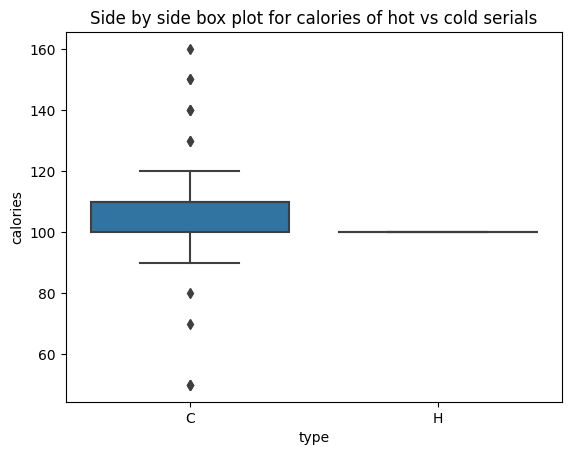

In [35]:
#Question 6 - side by side boxplot of calories of hot vs cold cereals
sns.boxplot(x="type",y="calories",data=df)
plt.title("Side by side box plot for calories of hot vs cold serials")
plt.show()

In [36]:
#Question 7 - are the calories and consumer rating correlated
from scipy.stats import pearsonr
corr,p = pearsonr(df.calories,df.rating)

print("correlation :",corr)
print("p value",p)

correlation : -0.6743360496799724
p value 2.4267697408657252e-11


In [37]:
#Question 8 - are mfr and consumer rating correlated
from scipy.stats import chi2_contingency
x = np.array(df.mfr)
y = np.array(df.rating)

contingency_table = pd.crosstab(x,y)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Statistic: ", chi2)
print('p value',p)
if p > 0.05:
    print('not correlated')
else:
    print('correlated')



Chi-squared Statistic:  456.0
p value 0.4124224260799003
not correlated


In [45]:
#Question 9-which is the best vs worst cereal in terms of user rating 
print("Best cereal :" ,df.loc[df["rating"].idxmax(),"name"])
print("Worst cereal :" ,df.loc[df["rating"].idxmin(),"name"])

Best cereal : All-BranwithExtraFiber
Worst cereal : CapnCrunch


In [46]:
#Question 10 - which is the best vs worst cereal in terms of calories
print("Best cereal :" ,df.loc[df["calories"].idxmin(),"name"])
print("Worst cereal :" ,df.loc[df["calories"].idxmax(),"name"])

Best cereal : All-BranwithExtraFiber
Worst cereal : MueslixCrispyBlend


In [53]:
#Question 11 - Rate the top 5 cereals in terms of user rating
df2=df.sort_values(by="rating",ascending=False)
df2.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-BranwithExtraFiber,K,C,50,4.0,0,140.0,1.75,8,0,330,25.0,3,1.00,0.50,93.704912
63,ShreddedWheatnBran,N,C,90,3.0,0,180.0,4.00,19,0,140,25.0,1,1.00,0.67,74.472949
64,ShreddedWheatspoonsize,N,C,90,3.0,0,180.0,3.00,20,0,120,25.0,1,1.00,0.67,72.801787
62,ShreddedWheat,N,C,80,2.0,0,180.0,3.00,16,0,95,25.0,1,0.83,1.00,68.235885
19,CreamofWheatQuick,N,H,100,3.0,0,80.0,1.00,21,0,?,25.0,2,1.00,1.00,64.533816


In [59]:
#Question 12 - find the cereal with the highest sodium content
print("Highest sodium:" ,df.loc[df['sodium'].idxmax(),"name"])

Highest sodium: Product19


In [68]:
#Question 13-Identify the cereal with the lowest carbohydrate.
try:
    df['carbo'] = df['carbo'].astype(float)
except ValueError as e:
    # Handle the exception by replacing invalid values with NaN
    df['carbo'] = pd.to_numeric(df['carbo'], errors='coerce')

print("Lowest carbohydrates:" ,df.loc[df['carbo'].idxmin(),"name"])

Lowest carbohydrates: All-Bran


In [70]:
#Question 14-Are variable shelf and sugar correlated
contingency_table = pd.crosstab(df.shelf,df.sugars)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Statistic: ", chi2)
print('p value',p)
if p > 0.05:
    print('not correlated')
else:
    print('correlated')



Chi-squared Statistic:  46.310486656200936
p value 0.048836493203169996
correlated


In [75]:
#Question 15-Identify the manufacturer of the cereals with the highest cereal 
try:
    df['sugars'] = df['sugars'].astype(float)
except ValueError as e:
    # Handle the exception by replacing invalid values with NaN
    df['sugars'] = pd.to_numeric(df['sugars'], errors='coerce')

print("manufacturer:" ,df.loc[df['sugars'].idxmin(),"mfr"])

manufacturer: K
